<a href="https://colab.research.google.com/github/frankhuangg/DL_HW3/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install package_name

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for package-name: filename=package_name-0.1-py3-none-any.whl size=1254 sha256=adac4309b5729b4ce8d4ad75d983af126b40c8964be923ae3424dae3b89cfb38
  Stored in directory: /root/.cache/pip/wheels/aa/56/2f/2bf8ec875b1c71660b2692b4aab073132abc78ac076140489b
Successfully built package-name


將 tensorflow 值都設為 1

In [7]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


將 tensorflow 值都設為 0

In [9]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


將 tensorflow 值用隨機亂數

In [10]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 0.40080732]
 [-0.5787242 ]
 [-0.57168394]], shape=(3, 1), dtype=float32)


In [11]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.91765547]
 [0.8345872 ]
 [0.13453186]], shape=(3, 1), dtype=float32)


 NumPy 數組是可賦值的

In [12]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

TensorFlow 張量不可賦值

In [43]:
x = tf.ones(shape=(2, 2))
x[0, 0] = 0.

TypeError: ignored

創建一個 TensorFlow 變量

In [13]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.3563285 ],
       [-0.47516462],
       [ 0.3708823 ]], dtype=float32)>


為 TensorFlow 變量賦值

In [14]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

為 TensorFlow 變量的子集賦值

In [15]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

使用assign_add()

In [16]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

一些基本的數學運算

In [17]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

 使用GradientTape

In [18]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

 使用GradientTape常量張量輸入

In [19]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

使用嵌套梯度帶計算二階梯度

In [20]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

在 2D 平面中生成兩類隨機點

In [21]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)


將兩個類堆疊成一個形狀為 (2000, 2) 的數組

In [22]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

生成相應的目標（0 和 1）

In [23]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

繪製兩個點類

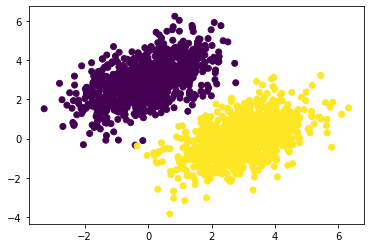

In [24]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

創建線性分類器變量

In [25]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

前向傳遞函數

In [26]:
def model(inputs):
    return tf.matmul(inputs, W) + b

均方誤差損失函數

In [27]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

訓練步驟函數

In [28]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

批量訓練循環

In [29]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.2481
Loss at step 1: 0.0821
Loss at step 2: 0.0763
Loss at step 3: 0.0716
Loss at step 4: 0.0674
Loss at step 5: 0.0636
Loss at step 6: 0.0601
Loss at step 7: 0.0569
Loss at step 8: 0.0540
Loss at step 9: 0.0514
Loss at step 10: 0.0490
Loss at step 11: 0.0468
Loss at step 12: 0.0448
Loss at step 13: 0.0429
Loss at step 14: 0.0413
Loss at step 15: 0.0397
Loss at step 16: 0.0383
Loss at step 17: 0.0371
Loss at step 18: 0.0359
Loss at step 19: 0.0349
Loss at step 20: 0.0339
Loss at step 21: 0.0330
Loss at step 22: 0.0322
Loss at step 23: 0.0315
Loss at step 24: 0.0308
Loss at step 25: 0.0302
Loss at step 26: 0.0297
Loss at step 27: 0.0292
Loss at step 28: 0.0287
Loss at step 29: 0.0283
Loss at step 30: 0.0279
Loss at step 31: 0.0276
Loss at step 32: 0.0272
Loss at step 33: 0.0269
Loss at step 34: 0.0267
Loss at step 35: 0.0264
Loss at step 36: 0.0262
Loss at step 37: 0.0260
Loss at step 38: 0.0258
Loss at step 39: 0.0257


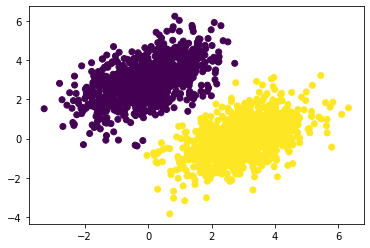

In [30]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

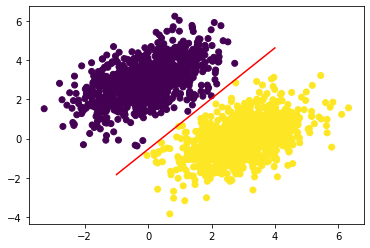

In [31]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

Dense作為Layer子類實現的層

In [32]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [33]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [34]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [35]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [36]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

In [37]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [38]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

In [39]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 1s 3ms/step - loss: 5.7484 - binary_accuracy: 0.7005
Epoch 2/5
16/16 [==============================] - 0s 3ms/step - loss: 5.4191 - binary_accuracy: 0.7095
Epoch 3/5
16/16 [==============================] - 0s 3ms/step - loss: 5.1491 - binary_accuracy: 0.7210
Epoch 4/5
16/16 [==============================] - 0s 3ms/step - loss: 4.8883 - binary_accuracy: 0.7280
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 4.6395 - binary_accuracy: 0.7340


In [40]:
history.history

{'loss': [5.748360633850098,
  5.419121265411377,
  5.149080753326416,
  4.888268947601318,
  4.639487266540527],
 'binary_accuracy': [0.7005000114440918,
  0.7095000147819519,
  0.7210000157356262,
  0.7279999852180481,
  0.734000027179718]}

使用validation_data參數

In [41]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 4ms/step - loss: 0.2285 - binary_accuracy: 0.9186 - val_loss: 0.2199 - val_binary_accuracy: 0.7783
Epoch 2/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0754 - binary_accuracy: 0.9514 - val_loss: 0.1804 - val_binary_accuracy: 0.6917
Epoch 3/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0647 - binary_accuracy: 0.9571 - val_loss: 0.0693 - val_binary_accuracy: 0.9917
Epoch 4/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0698 - binary_accuracy: 0.9586 - val_loss: 0.0292 - val_binary_accuracy: 1.0000
Epoch 5/5
88/88 [==============================] - 1s 6ms/step - loss: 0.0741 - binary_accuracy: 0.9486 - val_loss: 0.0687 - val_binary_accuracy: 0.9617


In [42]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

[[-0.15005139]
 [-0.12194768]
 [ 0.66035867]
 [-0.02740282]
 [ 0.67160106]
 [-0.35092577]
 [-0.04801071]
 [-0.0420942 ]
 [-0.24541005]
 [ 0.5496829 ]]
